In [2]:
import numpy
from ppe import pressure_poisson

In [6]:
# %load snippets/cavity_flow.py
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    ny, nx = u.shape
    b = numpy.zeros((ny, nx))

    for n in range(nt):
        un = u.copy()
        vn = v.copy()

        b = bracket_term_ppe(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b, 1e-3)

        u[1:-1,1:-1] = (un[1:-1, 1:-1] -
                        un[1:-1,1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1 ] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                        dt / (2 * rho * dx) *
                        (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                        nu * dt *
                        (1 / dx**2 *
                         (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        1 / dy**2 *
                         (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                        (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                        (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) *
                        (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * dt *
                        (1 / dx**2 *
                         (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        1 / dy**2 *
                         (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] +vn[0:-2, 1:-1])))

        #remember order of these will have a (very small) effect on the 
        #final answers.  if you want to compare between versions, make sure
        #they match up
        u[:, 0] = 0
        u[:, -1] = 0
        v[:, 0] = 0
        v[:, -1] = 0
        u[0, :] = 0
        u[-1, :] = 1    #set velocity on cavity lid equal to 1
        v[0, :] = 0
        v[-1, :]=0
        
        
        
    return u, v, p


In [ ]:
# %load snippets/quiver_plot.py
def quiver_plot(u, v, p, nx=41):
    nx = 41
    ny = nx
    x = numpy.linspace(0, 2, nx)
    y = numpy.linspace(0, 2, ny)
    X, Y = numpy.meshgrid(x, y)

    quiver_skip = qs = 4
    pyplot.figure(figsize=(11, 7), dpi=100)
    pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
    pyplot.colorbar()
    pyplot.contour(X, Y, p)
    pyplot.quiver(X[::qs, ::qs], Y[::qs, ::qs], u[::qs, ::qs], v[::qs, ::qs])


In [15]:
# %load snippets/bracket_term.py
def bracket_term_ppe(b, rho, dt, u, v, dx, dy):
    b[1:-1, 1:-1] = (
        rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) +
                         (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                        ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                    2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                         (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx)) -
                        ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2)
                    )

    return b


In [20]:
from matplotlib import pyplot, cm
%matplotlib inline

In [21]:
import pickle

In [22]:
def run_cavity():
    nx = 41
    ny = 41
    with open('IC.pickle', 'rb') as f:
        u, v, p, b = pickle.load(f)

    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    rho = 1
    nu = 0.1
    dt = .005

    nt = 500
    u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)
    
    return u, v, p

In [23]:
u, v, p = run_cavity()

In [27]:
# %load snippets/quiver_plot.py
def quiver_plot(u, v, p, nx=41):
    nx = 41
    ny = nx
    x = numpy.linspace(0, 2, nx)
    y = numpy.linspace(0, 2, ny)
    X, Y = numpy.meshgrid(x, y)

    quiver_skip = qs = 4
    pyplot.figure(figsize=(11, 7), dpi=100)
    pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
    pyplot.colorbar()
    pyplot.contour(X, Y, p)
    pyplot.quiver(X[::qs, ::qs], Y[::qs, ::qs], u[::qs, ::qs], v[::qs, ::qs])


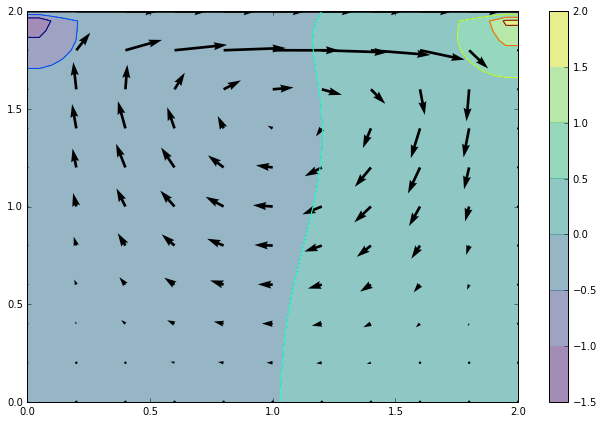

In [28]:
quiver_plot(u, v, p)

In [30]:
'numba' in dir()

False